In [30]:
text="""
Training a large-scale AI model like amazing DeepSeek (Giving us hope that technology is making great moves everyday) from scratch at a reduced cost involves implementing innovative strategies across data management, model architecture, hardware utilization, and training methodologies. DeepSeek’s approach provides valuable insights into achieving high performance with cost efficiency. Here’s how you can emulate their success:

. Innovative Model Architecture
Mixture of Experts (MoE): DeepSeek employed a “mixture of experts” approach, distributing tasks among specialized sub-models rather than relying on a single, monolithic model. This strategy reduces computational load and enhances efficiency.
Multi-Stage Training: Implement a phased training process, where each stage focuses on specific improvements such as accuracy or alignment. For instance, start with general text data pretraining, followed by reinforcement learning on user feedback to enhance conversational abilities.
Avoid R&D cost: Implementing something for the second time is significantly cheaper since minimal research and development (R&D) is required. R&D is typically the biggest expense in any innovation. Take the invention of the light bulb or mobile phone as an example — initially, they were sold at extremely high prices due to the substantial R&D costs. However, over time, as development costs were recovered, prices dropped, making them affordable for as little as $50 per mobile phone. Initially, selling them at such a low price was impossible due to the high investment in R&D and as OPENAI is still under their R&D process of achieving more great things, so they can not still make them opensource or lower cost that much, as they have their own R&D cost of doing things first time in the world. Once the thing is done first time, there are many researches available done by universities and institutes and are opensource, those can really reduce the company cost of R&D.
2. Efficient Data Management
High-Quality Curated Datasets: Utilize well-curated datasets to ensure the model learns from accurate and relevant information, reducing the need for extensive data cleaning and processing.
Synthetic Data Generation: Generate synthetic data to augment training datasets, especially in specialized domains, to enhance model robustness without incurring high data acquisition costs.
3. Hardware Optimization
Leverage Available Hardware: DeepSeek capitalized on available high-performance chips, such as Nvidia’s H800, to optimize their training process. Assess the hardware at your disposal and optimize your training algorithms to make the most of it.
Mixed-Precision Training: Implement mixed-precision arithmetic to reduce memory usage and increase computational speed without compromising model accuracy.
4. Cost-Effective Training Strategies
Programming Shortcuts: DeepSeek utilized innovative programming shortcuts to reduce data-processing requirements, significantly cutting down training costs. Explore algorithmic optimizations that can streamline computations.
Open-Source Tools: Leverage open-source frameworks and tools to build and train your models, minimizing software development costs.
To make training a model like DeepSeek even cheaper, you can focus on reducing computational costs, optimizing data processing, and leveraging alternative training approaches. Here are additional cost-saving techniques:





"""

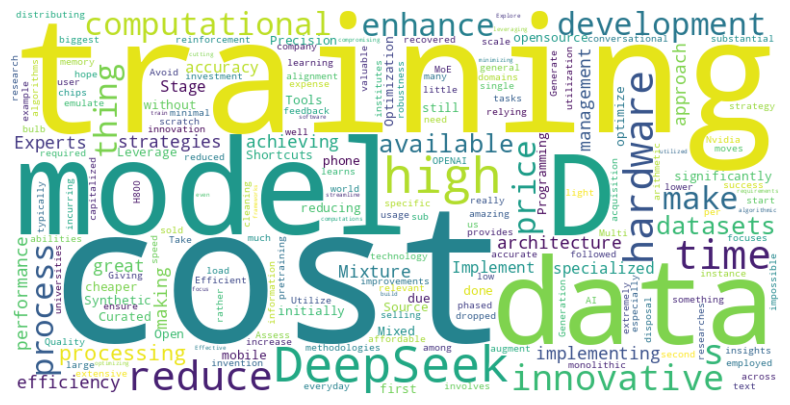

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text


# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


<ipython-input-37-7989bbdc1940>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('', inplace=True)


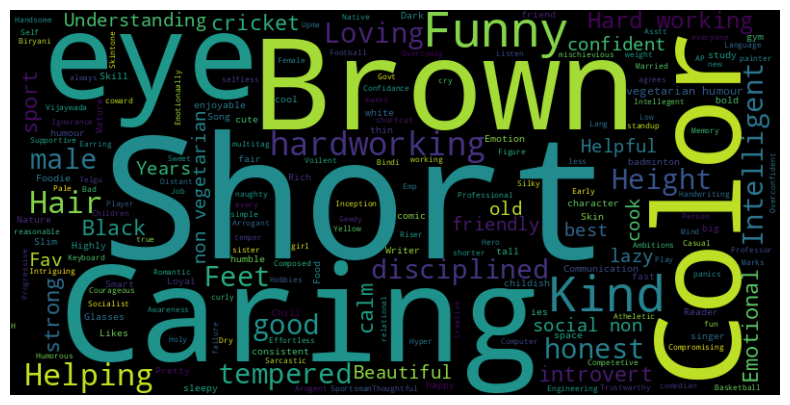

In [37]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the Excel file
file_path = "/content/Person_Data.xlsx"  # Update with the correct file path
df = pd.read_excel("/content/Person_Data.xlsx", sheet_name="Sheet1")
# replace nan with empty string
df.fillna('', inplace=True)

# replace years with empty string
df.replace(['years','kg','small','Age','skin','True','Kg','Cm','Type','thing','Mov'], '', regex=True, inplace=True)

# Combine all attribute columns into a single text corpus
text_data = df.iloc[:, 2:].astype(str).values.flatten()  # Extract only attribute columns
text_corpus = " ".join(text_data)  # Convert to a single text string

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text_corpus)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Word Embedding**

In [34]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [35]:
import pandas as pd
import re
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Download necessary NLP resources


# Load the dataset
file_path = "/content/Person_Data.xlsx"  # Update with correct path
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Combine all attribute columns into a single text corpus
text_data = df.iloc[:, 2:].astype(str).values.flatten()
text_corpus = " ".join(text_data)

# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return words

# Tokenize the text data
tokenized_text = [preprocess_text(text_corpus)]

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Example: Get the vector for a specific word
word = "funny"
if word in model.wv:
    print(f"Word Embedding for '{word}':\n", model.wv[word])
else:
    print(f"'{word}' not in vocabulary.")


Word Embedding for 'funny':
 [-1.35412747e-02  1.34696485e-02  5.80059132e-03  1.54062361e-02
  4.15413873e-03 -9.77190025e-03  1.44205149e-02  1.15330480e-02
 -1.39973098e-02  2.27990351e-03  7.01297307e-03 -1.51008954e-02
  6.75419951e-03  2.13081785e-03  9.29751247e-03 -5.16930036e-03
 -4.11134120e-03 -6.18518470e-03 -1.49353808e-02 -2.05062348e-02
  7.93468114e-03  1.04032177e-02  1.62800662e-02 -9.89919715e-03
  3.83141125e-03  1.12242869e-03 -5.43676177e-03 -1.15296058e-02
 -8.72911979e-03 -1.13410782e-02  9.26283188e-03 -4.64141415e-03
  1.26346340e-02  1.85411295e-03 -7.00963102e-03  1.20512489e-02
  3.77075025e-03 -4.08245505e-05 -8.87390343e-04 -2.24144906e-02
 -6.86466601e-03  2.43294242e-04 -6.68100221e-03 -3.94213479e-03
  6.07200572e-03 -3.58241796e-03 -4.94506722e-03  3.80493631e-03
  2.01061764e-03  2.88210716e-03  2.42949766e-03  1.38200819e-03
 -7.86697783e-04 -4.13587410e-03  4.56904247e-03 -2.41229404e-03
  5.06435754e-03  2.30270103e-04 -4.38500009e-03 -8.58711312e